In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('数据整合.csv')
data.head()

,Formula,Band gap,MP-ID,density,vpa,packing fraction,Central symmetry
0,Ba3Ca2(SiN3)2,1.875,mp-1019520,4.570851,17.671158,0.834911,0
1,IrI3,1.398,mp-1025442,6.805422,34.949094,0.320381,0
2,ThTe3,1.088,mp-1025522,6.862531,37.193373,0.395979,0
3,Y4Se3N2,1.445,mp-1029349,4.989108,22.947597,0.576815,0
4,RbSbO2,2.277,mp-10418,4.731690,20.988543,0.821177,0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [3]:
y = data['Central symmetry'].values
excluded = ['Formula', 'MP-ID', 'Central symmetry']
X = data.drop(excluded, axis = 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size = 0.3,
                                                    random_state = 77)

In [5]:
modelBNB = BernoulliNB(binarize = 0.1, alpha = 1)
modelBNB.fit(X_train, y_train)
modelBNB.score(X_test, y_test)

0.5081967213114754

In [6]:
param_grid = {'binarize': np.arange(0, 1.1, 0.1),
              'alpha': np.arange(0, 1.1, 0.1),
              }
kfold = StratifiedKFold(n_splits = 10, shuffle=True,
                        random_state = 2)
model_BNB = GridSearchCV(BernoulliNB(),
                     param_grid, cv = kfold)

In [7]:
model_BNB.fit(X_train, y_train)

E:\an\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
E:\an\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
E:\an\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
E:\an\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
E:\an\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
E:\an\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
E:\an\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small w

E:\an\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2, shuffle=True),
             estimator=BernoulliNB(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'binarize': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [8]:

model_BNB.score(X_test, y_test)

0.5409836065573771

In [9]:
model_BNB.best_params_

{'alpha': 0.0, 'binarize': 0.7000000000000001}

In [10]:
model_BNB.best_score_

0.5617386489479513

In [11]:

model_BNB.best_estimator_

BernoulliNB(alpha=0.0, binarize=0.7000000000000001)

In [12]:
model_bnb = BernoulliNB(alpha=0.8, binarize=0.8)
model_bnb.fit(X_train, y_train)
model_bnb.score(X_test, y_test)

0.5245901639344263

In [14]:
y_pred = model_BNB.predict(X_test)
y_pred.shape

(183,)

[[17 73]
 [11 82]]


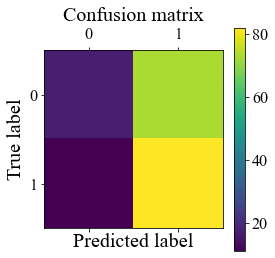

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman']
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix',fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.ylabel('True label', fontsize = 20)
plt.xlabel('Predicted label',fontsize = 20)
plt.savefig('c1.png', dpi = 300)
#plt.show()

In [16]:
#from sklearn.inspection import plot_partial_dependence
table = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
table

Predicted,0,1
Actual,,
0,17,73
1,11,82


In [17]:
table = np.array(table)
Accuracy = (table[0, 0] + table[1,1]) /np.sum(table)
Accuracy

0.5409836065573771

In [18]:
Error_rate = 1 - Accuracy
Error_rate

0.4590163934426229

In [19]:
Precision = table[1, 1]/(table[1, 1]+table[0, 1])
print('Precision:', Precision)

Sensitivity = table[1, 1]/(table[1, 0] + table[1,1])
print(Sensitivity)

Specificity = table[0, 0] /(table[0,0] + table[0, 1])
print(Specificity)

Recall = table[1, 1] /(table[0, 1] + table[1,1])
print(Recall)

cohen_kappa_score(y_test, y_pred)

Precision: 0.5290322580645161
0.8817204301075269
0.18888888888888888
0.5290322580645161


0.07140268213120693

In [20]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred)) 

0.6612903225806452


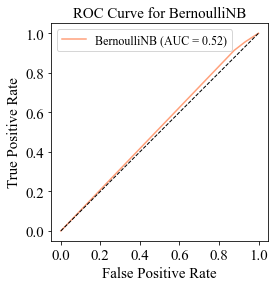

In [21]:
from sklearn.metrics import RocCurveDisplay
plt.rcParams['font.sans-serif']=['Times New Roman']

RocCurveDisplay.from_estimator(model_bnb, X_test, y_test, color = 'lightsalmon')
x = np.linspace(0, 1, 100)
plt.plot(x, x, 'k--', linewidth = 1)
plt.title('ROC Curve for BernoulliNB', fontsize = 15)
plt.axis('square')
plt.xlim()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate',fontsize = 15)
fontdict = {'family': 'Times New Roman',
            'size': 12}
            #'style': 'italic'}
plt.legend(prop=fontdict, loc = 'upper left')
plt.savefig('r1.png', dpi = 300)
#plt.show()